# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | kargasok
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | nikolayevsk-on-amure
Processing Record 7 of Set 1 | magadan
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | ribeira brava
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | port saint john's
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | puerto armuelles
Processing Record 19 of Set 1 | mafeteng
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | ormara
Processing Record 22 of Se

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.13,88,100,15.18,TF,1727399253
1,waitangi,-43.9535,-176.5597,8.23,97,100,4.02,NZ,1727399254
2,adamstown,-25.0660,-130.1015,21.66,88,73,4.93,PN,1727399256
3,kargasok,59.0556,80.8572,0.23,97,100,3.59,RU,1727399257
4,wailua homesteads,22.0669,-159.3780,28.44,72,100,5.14,US,1727399258


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.13,88,100,15.18,TF,1727399253
1,waitangi,-43.9535,-176.5597,8.23,97,100,4.02,NZ,1727399254
2,adamstown,-25.0660,-130.1015,21.66,88,73,4.93,PN,1727399256
3,kargasok,59.0556,80.8572,0.23,97,100,3.59,RU,1727399257
4,wailua homesteads,22.0669,-159.3780,28.44,72,100,5.14,US,1727399258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

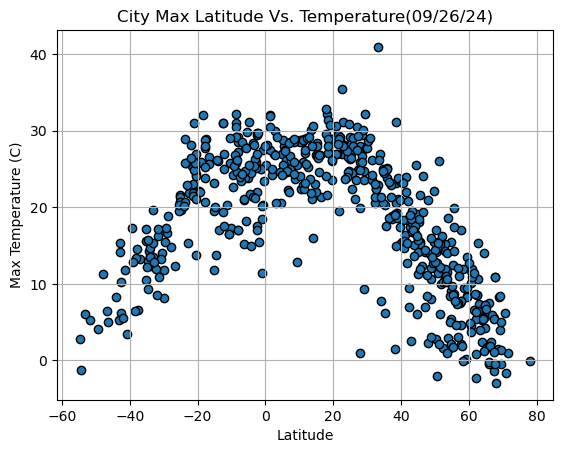

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

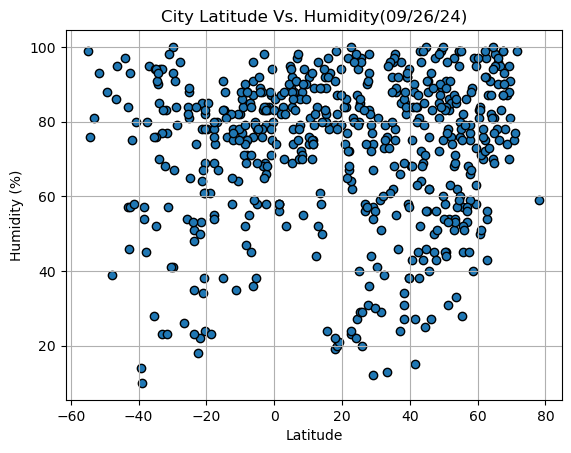

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

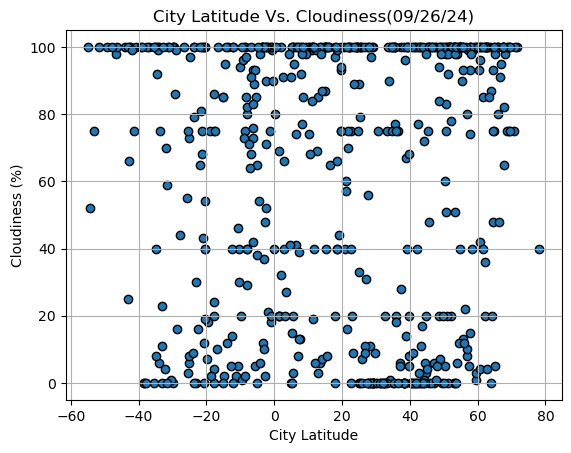

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

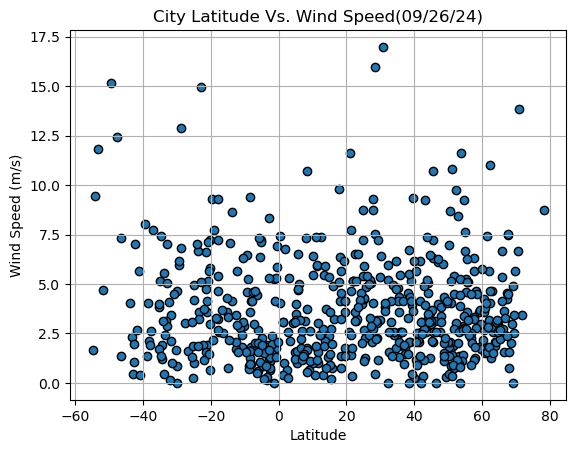

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regression = slope *np.array(x) + intercept
    line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regression,color="red")
    plt.annotate(line_eq, (x.min(), y.min()),fontsize=12,color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r^2 value is: {rvalue**2}")
    plt.show()

In [7]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kargasok,59.0556,80.8572,0.23,97,100,3.59,RU,1727399257
4,wailua homesteads,22.0669,-159.3780,28.44,72,100,5.14,US,1727399258
5,nikolayevsk-on-amure,53.1406,140.7300,10.74,97,100,1.37,RU,1727399259
6,magadan,59.5667,150.8000,8.37,63,1,1.88,RU,1727399260
8,guerrero negro,27.9769,-114.0611,19.85,83,0,9.27,MX,1727399180


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.13,88,100,15.18,TF,1727399253
1,waitangi,-43.9535,-176.5597,8.23,97,100,4.02,NZ,1727399254
2,adamstown,-25.0660,-130.1015,21.66,88,73,4.93,PN,1727399256
7,margaret river,-33.9500,115.0667,13.66,70,100,5.54,AU,1727399261
9,hermanus,-34.4187,19.2345,14.33,90,100,1.91,ZA,1727399264


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.689540535811254


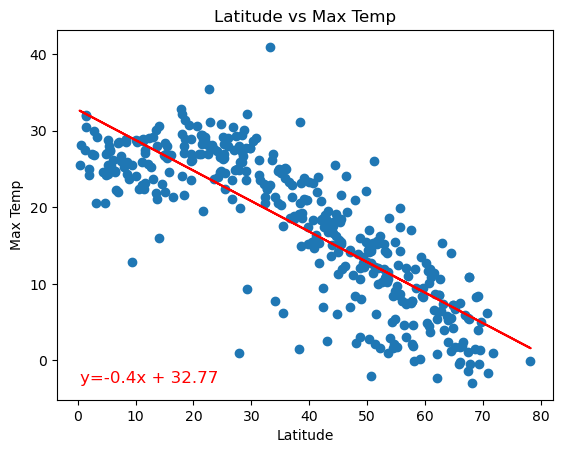

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude", "Max Temp", 
    "Latitude vs Max Temp", )
plt.savefig("../output_data/N_temp_vs_lat_plot.png")


The r^2 value is: 0.5403392006152187


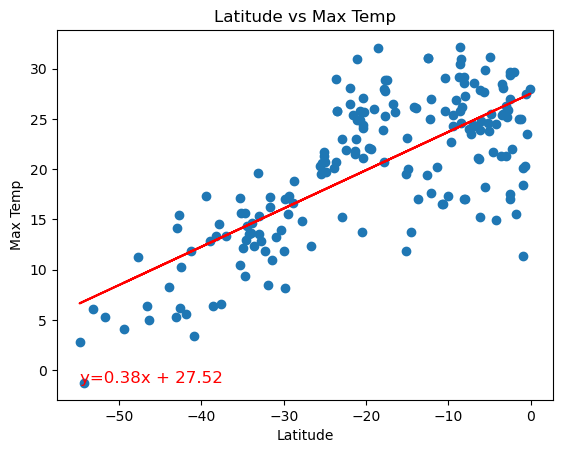

<Figure size 640x480 with 0 Axes>

In [20]:
# Linear regression on Southern Hemisphere
linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude", "Max Temp", 
    "Latitude vs Max Temp", )
plt.savefig("../output_data/S_temp_vs_lat_plot.png")

**Discussion about the linear relationship:** There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.000283022207397699


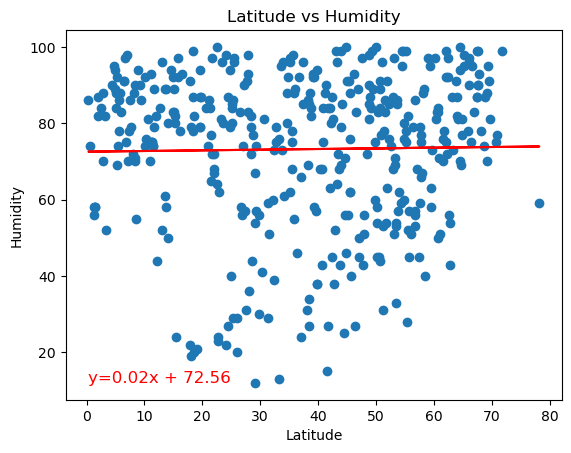

<Figure size 640x480 with 0 Axes>

In [23]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude", "Humidity", 
    "Latitude vs Humidity")
plt.savefig("../output_data/N_Humidity_vs_lat_plot.png")

The r^2 value is: 0.00900204376049237


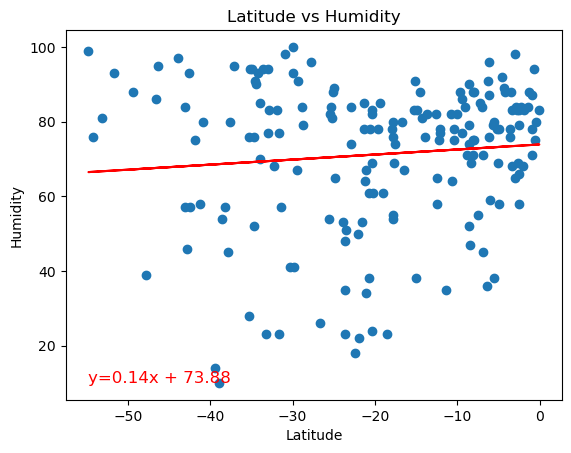

<Figure size 640x480 with 0 Axes>

In [24]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude", "Humidity", 
    "Latitude vs Humidity")
plt.savefig("../output_data/S_Humidity_vs_lat_plot.png")

**Discussion about the linear relationship:** There is reasonably no correlation between latitude and humidity, the r square value is close to 0 indicate that result for both north and south hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.006483103671886882


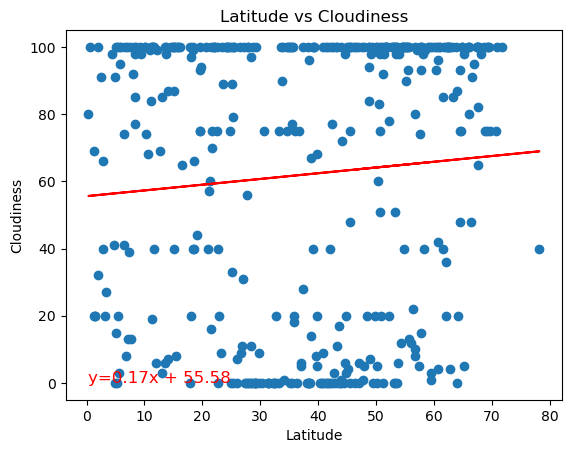

<Figure size 640x480 with 0 Axes>

In [28]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness", 
    "Latitude vs Cloudiness")
plt.savefig("../output_data/N_Cloudiness_vs_lat_plot.png")

The r^2 value is: 0.005127960052166726


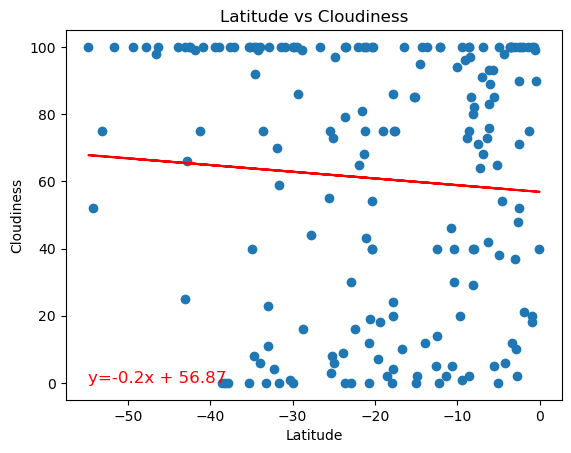

<Figure size 640x480 with 0 Axes>

In [27]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude", "Cloudiness", 
    "Latitude vs Cloudiness")
plt.savefig("../output_data/S_Cloudiness_vs_lat_plot.png")


**Discussion about the linear relationship:** There is little to no relationship between latitude and cloudiness based on the data available.The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.0024658713504358293


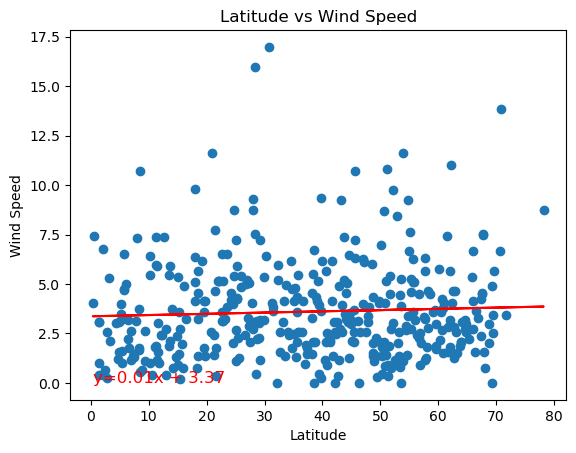

<Figure size 640x480 with 0 Axes>

In [29]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed", 
    "Latitude vs Wind Speed")
plt.savefig("../output_data/N_Wind Speed_vs_lat_plot.png")

The r^2 value is: 0.05538913668355454


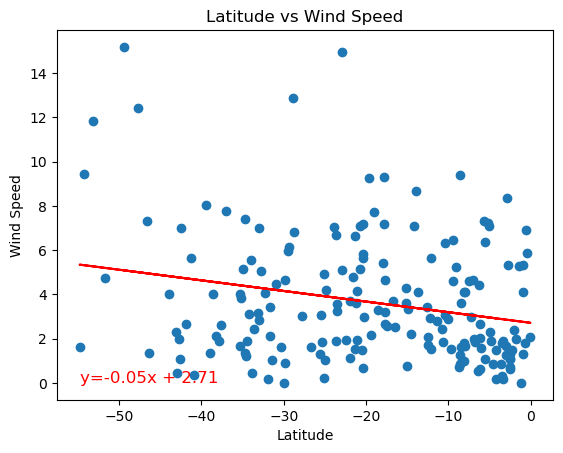

<Figure size 640x480 with 0 Axes>

In [30]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude", "Wind Speed", 
    "Latitude vs Wind Speed")
plt.savefig("../output_data/S_Wind Speed_vs_lat_plot.png")

**Discussion about the linear relationship:** There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread.